#                             **New York City Taxi Fare Prediction**

It involves:

1)Creating base model

2)EDA and Feature engineering

3)Creating final model and choosing the best one to test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [3]:
#Read train data

df_train = pd.read_csv(r'C:\Users\Priti\Desktop\corpnce_data_science\kaggle proj\all\train.csv',nrows=500000)


In [4]:
#Read test data

df_test = pd.read_csv(r'C:\Users\Priti\Desktop\corpnce_data_science\kaggle proj\all\test.csv', nrows=10000)

In [5]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df_train.shape

(500000, 8)

In [7]:
df_train.info()

# 5 null values in our train dataset for 2 features.
#2 features are of non-numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
key                  500000 non-null object
fare_amount          500000 non-null float64
pickup_datetime      500000 non-null object
pickup_longitude     500000 non-null float64
pickup_latitude      500000 non-null float64
dropoff_longitude    499995 non-null float64
dropoff_latitude     499995 non-null float64
passenger_count      500000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 30.5+ MB


In [8]:
#Let's drop NaN
df_train.dropna(axis=0,inplace=True)
df_train.shape

(499995, 8)

In [9]:
df_train.describe() 


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


**Let's create a base model**

**Separate features and label**

In [10]:
X = df_train.iloc[:,3:]
y = df_train['fare_amount']
print(X.shape)
print(y.shape)


(499995, 5)
(499995,)


**Splitting data for train and validation**

In [11]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.2,random_state=42)
print(X_train.shape)
print(X_val.shape)

(399996, 5)
(99999, 5)


**Fitting and predicting KNN Regression model**

In [12]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [13]:
val_pred_knn = knn.predict(X_val)
val_pred_knn

array([27.04 ,  6.28 , 16.166, ...,  3.88 ,  9.04 ,  8.96 ])

**Evaluation of KNN Model**

In [14]:
print('Explained variance score for KNN Regressor is:',metrics.explained_variance_score(y_val,val_pred_knn),'\n')
print('RMSE',np.sqrt(metrics.mean_squared_error(y_val,val_pred_knn)))

Explained variance score for KNN Regressor is: 0.740640387584992 

RMSE 5.072961846260913


**Random Forest Regressor Base model**

In [15]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
val_pred_rf = rf.predict(X_val,)
val_pred_rf

array([26.94 ,  5.47 , 12.097, ...,  4.65 ,  8.97 ,  9.27 ])

**Evaluation of Random Forest Regressor**

In [17]:
print('Explained variance score for Rrandom Forest Regressor is:',metrics.explained_variance_score(y_val,val_pred_rf),'\n')
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,val_pred_rf)))

Explained variance score for Rrandom Forest Regressor is: 0.7430868081534736 

RMSE: 5.046190539884754


**Fit and predict XGBoost regressor**

In [18]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
val_pred_xg = xg.predict(X_val)
val_pred_xg

array([31.150454 ,  7.892882 , 10.745933 , ...,  7.9308305,  8.584847 ,
        9.207785 ], dtype=float32)

**Evaluate model**

In [20]:
print('Explained variance score for XGBoost Regressor is:',metrics.explained_variance_score(y_val,val_pred_xg),'\n')
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_val,val_pred_xg)))

Explained variance score for XGBoost Regressor is: 0.7025050844689252 

RMSE: 5.430120337350008


**Base model results:**

**KNN Regressor:**

Explained variance score for KNN Regressor is: 0.740640387584992 

RMSE 5.072961846260913

**Random Forest Regressor:**

Explained variance score for Rrandom Forest Regressor is: 0.7430868081534736 

RMSE: 5.046190539884754

**XGBoost Regressor:**

Explained variance score for XGBoost Regressor is: 0.7025050844689252 

RMSE: 5.430120337350008

**Let's perform some visualisation and feature engineering for better RMSE and explained variance**

Correlation Matrix

In [21]:
df_train.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.008822,-0.007779,0.009233,-0.007865,0.013823
pickup_longitude,0.008822,1.000000,-0.522516,0.839781,-0.571343,-0.002501
pickup_latitude,-0.007779,-0.522516,1.000000,-0.604772,0.611882,0.001567
dropoff_longitude,0.009233,0.839781,-0.604772,1.000000,-0.484829,-0.001761
dropoff_latitude,-0.007865,-0.571343,0.611882,-0.484829,1.000000,0.001438
passenger_count,0.013823,-0.002501,0.001567,-0.001761,0.001438,1.000000


**Let's explore the data**

In [22]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


We could see fare_amount has negative values, in practical fare cannot be negative

Also we can see some outliers in all features


In [22]:
#function to check if there is any 0 values in each column, as none of the features can be zero practically

def zero_chk(x):
    a = np.sum(x==0)
    return a
        
    

In [23]:
#apply the function for each column

{i:df_train[i].apply(zero_chk).sum() for i in df_train.columns}

#passanger count and fare_amount cannot be zero or negative values, let's drop rows where passenger count and fare_amount is 0 or negative values


{'key': 0,
 'fare_amount': 14,
 'pickup_datetime': 0,
 'pickup_longitude': 9431,
 'pickup_latitude': 9407,
 'dropoff_longitude': 9455,
 'dropoff_latitude': 9426,
 'passenger_count': 1791}

In [24]:
#Drop the values which are zero or negative as they don't make any sense
len(df_train[df_train['fare_amount']<= 0])

35

In [25]:
df_train.drop(df_train[df_train['fare_amount']<=0].index,axis=0, inplace=True)
df_train.shape

(499960, 8)

In [26]:
#Drop the values which are zero or negative as they don't make any sense
len(df_train[df_train['passenger_count']<= 0])

1791

In [27]:
df_train.drop(df_train[df_train['passenger_count']<=0].index,axis=0, inplace=True)
df_train.shape

(498169, 8)

In [28]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000,498169.000000
mean,11.367853,-72.519354,39.919838,-72.521715,39.915998,1.689505
std,9.925028,11.864049,8.081813,11.804788,7.397667,1.305836
min,0.010000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,1.000000
25%,6.000000,-73.992048,40.734913,-73.991382,40.734054,1.000000
50%,8.500000,-73.981784,40.752667,-73.980126,40.753152,1.000000
75%,12.500000,-73.967115,40.767073,-73.963572,40.768132,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000



Now, for EDA. The following are my considerations -

Does the number of passengers affect the fare?

Does the date and time of pickup affect the fare?

Does the day of the week affect the fare?

Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following -

year

month

date

hour

day of week

In [29]:
#checking data type of each column

df_train.dtypes

# key and pickup_datetime has object types

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [30]:
# Key and pickup_datetime column gives dame information. So drop key column
df_train.drop('key',axis=1, inplace=True)
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [31]:
#convert pickup_date column to datetime datatype
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['pickup_datetime'].dtype

dtype('<M8[ns]')

In [32]:
#create different columns for date, month, year, day and hour for train dataset
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['year'] = df_train['pickup_datetime'].dt.year
df_train['date'] = df_train['pickup_datetime'].dt.day
df_train['day'] = df_train['pickup_datetime'].dt.dayofweek
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,day,hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,6,2009,15,0,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,1,2010,5,1,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,8,2011,18,3,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,21,5,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,3,2010,9,1,7


In [33]:
#drop pickup_datetime column as we have already extracted all the informatiom from that column
df_train.drop('pickup_datetime',axis=1,inplace=True)
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,day,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,6,2009,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,2010,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,8,2011,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3,2010,9,1,7


In [34]:
#removing the values they fall after 3 sigma
df_train = df_train[df_train.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
df_train.shape

(464996, 11)

In [35]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,day,hour
count,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000
mean,10.183870,-73.977449,40.752019,-73.975369,40.752242,1.595212,6.264207,2011.698785,15.673401,3.042884,13.520065
std,6.461802,0.044476,0.036723,0.083272,0.040159,1.153327,3.438957,1.864806,8.682318,1.947320,6.525478
min,0.010000,-80.616665,37.419853,-86.804122,34.534842,1.000000,1.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992379,40.737188,-73.991597,40.736529,1.000000,3.000000,2010.000000,8.000000,1.000000,9.000000
50%,8.100000,-73.982218,40.753704,-73.980719,40.754207,1.000000,6.000000,2012.000000,16.000000,3.000000,14.000000
75%,12.100000,-73.969072,40.767650,-73.965974,40.768552,2.000000,9.000000,2013.000000,23.000000,5.000000,19.000000
max,41.100000,-66.725790,51.084373,-37.233332,51.346519,5.000000,12.000000,2015.000000,31.000000,6.000000,23.000000


Now my data is clean, no outliers seen

**Number of passengers affect the fare?**

Text(0,0.5,'Frequency')

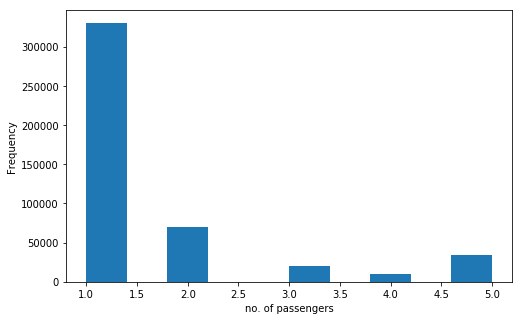

In [36]:
plt.figure(figsize=(8,5))
plt.hist(df_train['passenger_count'])
plt.xlabel('no. of passengers')
plt.ylabel('Frequency')


We could see that single passengers are frequent travellers

**Does pickup date and time affect the fare?**


Text(0,0.5,'Frequency')

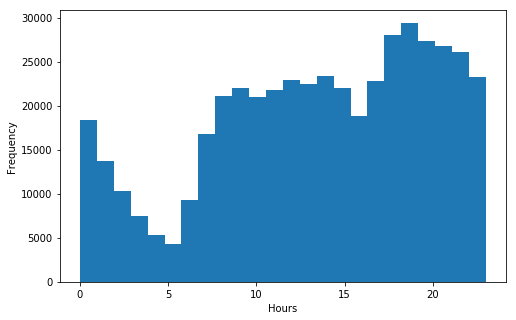

In [37]:
plt.figure(figsize=(8,5))
plt.hist(df_train['hour'],bins=24)
plt.xlabel('Hours')
plt.ylabel('Frequency')


Less people travel around 5AM and more travell around 6-7PM


Text(0,0.5,'Frequency')

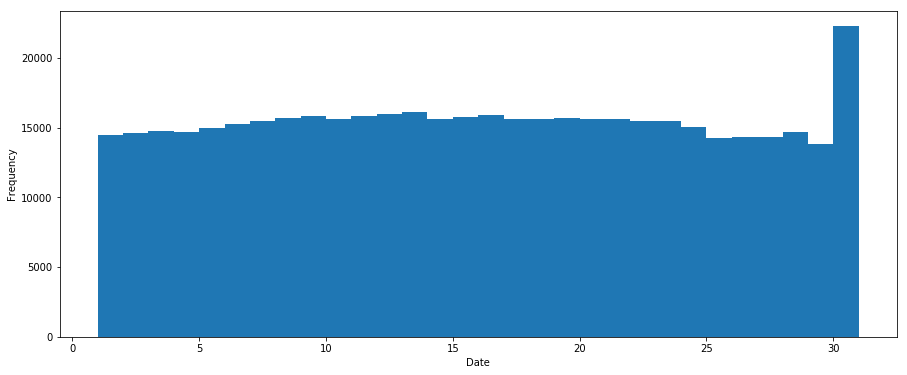

In [38]:
#checking if date of the month has any relation with travel

plt.figure(figsize=(15,6))
plt.hist(df_train['date'],bins=30)
plt.xlabel('Date')
plt.ylabel('Frequency')

Pretty clear!! Highest travell is on end of the month

Text(0,0.5,'Frequency')

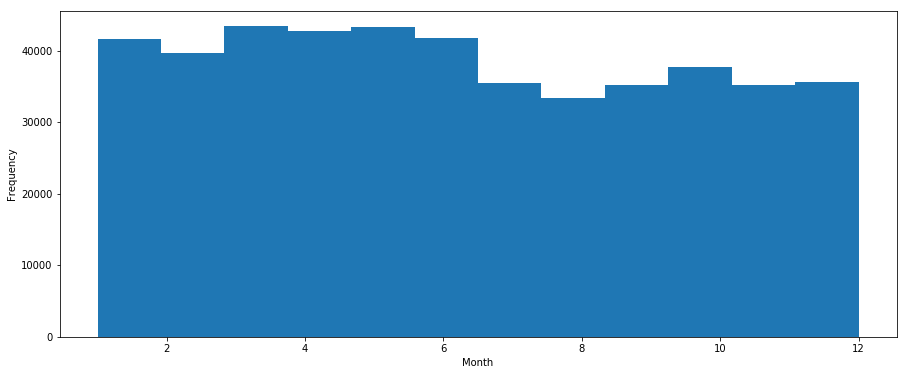

In [39]:
# monthly travel frequency

plt.figure(figsize=(15,6))
plt.hist(df_train['month'], bins=12)
plt.xlabel('Month')
plt.ylabel('Frequency')

First 6 months travel count is slightly higher than last 6 months count.

Text(0,0.5,'Frequency')

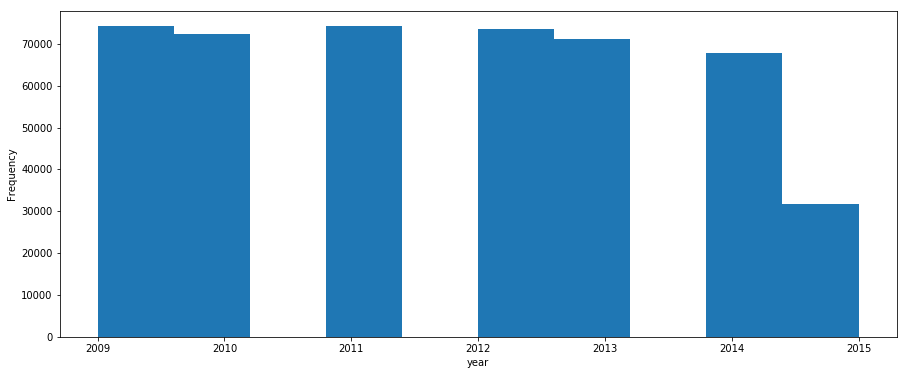

In [40]:
#yearly travel count

plt.figure(figsize=(15,6))
plt.hist(df_train['year'])
plt.xlabel('year')
plt.ylabel('Frequency')

Well.. We have data for 2009 to 2015 and from this we could say people used least taxis in 2015


** Day of the week has impact on taxi fare?**

Text(0,0.5,'Frequency')

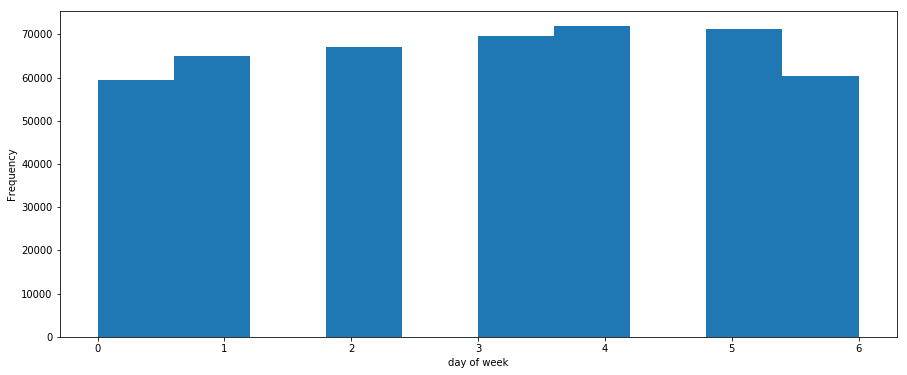

In [41]:
plt.figure(figsize=(15,6))
plt.hist(df_train['day'])
plt.xlabel('day of week')
plt.ylabel('Frequency')

Friday and Saturday slightly more people travell

**Let's create a new field 'distance' to fetch the distance between the pickup and the drop.**

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula
https://en.wikipedia.org/wiki/Haversine_formula

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 
6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

d = Haversine distance



In [71]:
#Creating Distance column on bith train and test data set

def haversine_distance(lat1, long1, lat2, long2):
    data = [df_train,df_test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [72]:
#applied Heversine distance formula on train dataset and created new column called H_Distance
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [44]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,day,hour,H_Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,6,2009,15,0,17,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,2010,5,1,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,8,2011,18,3,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,2012,21,5,4,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3,2010,9,1,7,1.999157


In [45]:
df_train.describe()

# we can see outliers in H_Distance column, let's work on that

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,day,hour,H_Distance
count,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000,464996.000000
mean,10.183870,-73.977449,40.752019,-73.975369,40.752242,1.595212,6.264207,2011.698785,15.673401,3.042884,13.520065,3.011213
std,6.461802,0.044476,0.036723,0.083272,0.040159,1.153327,3.438957,1.864806,8.682318,1.947320,6.525478,7.053643
min,0.010000,-80.616665,37.419853,-86.804122,34.534842,1.000000,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992379,40.737188,-73.991597,40.736529,1.000000,3.000000,2010.000000,8.000000,1.000000,9.000000,1.242083
50%,8.100000,-73.982218,40.753704,-73.980719,40.754207,1.000000,6.000000,2012.000000,16.000000,3.000000,14.000000,2.106225
75%,12.100000,-73.969072,40.767650,-73.965974,40.768552,2.000000,9.000000,2013.000000,23.000000,5.000000,19.000000,3.730604
max,41.100000,-66.725790,51.084373,-37.233332,51.346519,5.000000,12.000000,2015.000000,31.000000,6.000000,23.000000,3070.878955


Let's visualise the distance travelled, as we could see some outliers in H_distance column

(array([4.64987e+05, 4.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.        ,  307.0878955 ,  614.175791  ,  921.2636865 ,
        1228.351582  , 1535.43947751, 1842.52737301, 2149.61526851,
        2456.70316401, 2763.79105951, 3070.87895501]),
 <a list of 10 Patch objects>)

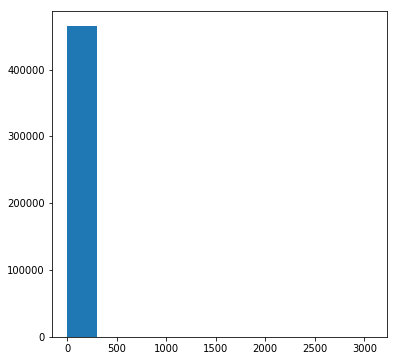

In [46]:
plt.figure(figsize=(6,6))
plt.hist(df_train['H_Distance'])

There are few entries above 200km, which are clear outliers

In [47]:
#distance travelled is below 10km

len(df_train[df_train['H_Distance']< 10])


451272

In [48]:
#distance travelled is above 10 and below 20

len(df_train[(df_train['H_Distance']> 10) & (df_train['H_Distance']<20)])

13401

In [49]:
#we see 583 rows are between 20 to 50km distance

len(df_train[(df_train['H_Distance']> 20) & (df_train['H_Distance']<50)])

178

In [50]:
#between 50 to 100km 

len(df_train[(df_train['H_Distance']>50) & (df_train['H_Distance']<100)])



60

In [51]:
#between 100 to 200km distance

print(len(df_train[(df_train['H_Distance']>100) & (df_train['H_Distance']<200)]))


74


In [52]:
#Distance travelled above 200km

print(len(df_train[(df_train['H_Distance']>200)]))
df_train[(df_train['H_Distance']>200)]

11


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,day,hour,H_Distance
98652,10.5,-78.083332,40.705727,-74.005315,40.728592,1,5,2011,3,1,7,343.669600
167270,14.5,-69.062927,41.746891,-73.986801,40.729618,2,6,2015,1,0,19,426.899528
219090,6.9,-73.974570,40.778297,-37.233332,40.765057,5,6,2012,25,0,10,3070.878955
276682,6.1,-67.528515,42.007640,-65.869243,44.416680,2,3,2011,8,1,18,299.712829
315625,16.5,-73.989094,40.726891,-86.804122,42.017485,3,7,2013,31,2,22,1077.884531
370078,4.9,-76.350000,40.773037,-73.946985,40.780137,1,4,2012,18,2,15,202.337950
411093,4.5,-80.616665,40.780687,-73.970537,40.789157,2,8,2012,6,0,11,559.425139
426590,7.5,-75.465314,47.023947,-73.994698,40.728430,1,4,2013,3,2,17,709.847019
445813,8.5,-73.963437,40.768817,-45.033332,40.754217,1,12,2011,19,0,16,2425.393079
488225,8.5,-73.978183,40.753437,-74.906680,34.534842,2,9,2009,19,5,17,696.278822


We could see 11 entries travelled above 200km, looks like wrong entries and let's drop them

In [53]:
df_train.drop(df_train[df_train['H_Distance'] > 200].index,inplace=True,axis=0)

In [54]:
print(df_train.shape)

(464985, 12)


Now data is ready to feed to the model

In [55]:
#separate features and label data to feed to the model

y_new = df_train['fare_amount']
df_train.drop(['fare_amount'],axis=1,inplace=True)
print(y_new.shape)


(464985,)


In [56]:
#input dataset

X_new = df_train
print(X_new.shape)



(464985, 11)


In [57]:
#split the data into train and test

X_train_new,X_val_new,y_train_new,y_val_new = train_test_split(X_new,y_new,test_size=.2,random_state=42)
print(X_train_new.shape)
print(X_val_new.shape)

(371988, 11)
(92997, 11)


**Build KNN Regressor**

In [58]:
#apply knn regressor

knn2 = KNeighborsRegressor(n_neighbors=7,n_jobs=-1)
knn2.fit(X_train_new,y_train_new)




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
          weights='uniform')

In [59]:
pred_knn2 = knn2.predict(X_val_new)
pred_knn2

array([13.5       , 17.90428571,  7.14285714, ...,  6.1       ,
        7.01428571,  5.24285714])

In [60]:
#Evaluating model

print('Explained variance for knn is : ',metrics.explained_variance_score(y_val_new,pred_knn2))

print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_val_new,pred_knn2)))

Explained variance for knn is :  0.777512700080961
RMSE :  3.0527991397780827


**Fit, predict and evaluate Random Forest Regressor**

In [61]:

rf2 = RandomForestRegressor(n_estimators=300,max_depth=8,min_samples_split=8,n_jobs=-1,random_state=42)
rf2.fit(X_train_new,y_train_new)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [62]:
pred_rf2 = rf2.predict(X_val_new)
pred_rf2

array([14.13791546, 18.30953757,  5.39317233, ...,  6.1230263 ,
        5.94398387,  4.87044777])

In [63]:
#Evaluating model

print('Explained variance for RF is : ',metrics.explained_variance_score(y_val_new,pred_rf2))

print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_val_new,pred_rf2)))

Explained variance for RF is :  0.8271627536184945
RMSE :  2.6862381414754126


**Let's apply XGBOOST regressor**

In [64]:

from xgboost import XGBRegressor
xg1 = XGBRegressor(learning_rate= 0.1, max_depth= 4, n_estimators= 300,n_jobs=-1,random_state=42)
xg1.fit(X_train_new,y_train_new)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [65]:
pred_xg1 = xg1.predict(X_val_new)
pred_xg1

array([13.611834 , 16.6328   ,  5.986913 , ...,  5.6307244,  5.7438188,
        4.2144675], dtype=float32)

In [66]:
print('Explained variance for XGBOOST is : ',metrics.explained_variance_score(y_val_new,pred_xg1))

print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_val_new,pred_xg1)))

Explained variance for XGBOOST is :  0.8530467810690195
RMSE :  2.4768757264875547


**Result and conclusion**

**KNN Regressor:**

Explained variance for knn is :  0.777512700080961

RMSE :  3.0527991397780827

**Random Forest Regressor:**

Explained variance for RF is :  0.8271627536184945

RMSE :  2.6862381414754126

**XGBoost Regressor:**

Explained variance for XGBOOST is :  0.8530467810690195

RMSE :  2.4768757264875547

Since **XGBoost** is giving least RMSE and better explained variance, taking it further for testing purpose.

Let's apply the feature engineering work that's done on train dataset 

In [67]:
df_test.head()
df_test.drop(['key'],axis=1,inplace=True)

In [68]:
#convert pickup_date column to datetime datatype
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'])
df_test['pickup_datetime'].dtype

#create different columns for date, month, year, day and hour for test dataset
df_test['month'] = df_test['pickup_datetime'].dt.month
df_test['year'] = df_test['pickup_datetime'].dt.year
df_test['date'] = df_test['pickup_datetime'].dt.day
df_test['day'] = df_test['pickup_datetime'].dt.dayofweek
df_test['hour'] = df_test['pickup_datetime'].dt.hour


#drop pickup_datetime column as we have already extracted all the informatiom from that column
df_test.drop('pickup_datetime',axis=1,inplace=True)
print(df_test.shape)
df_test.head()

(9914, 11)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,month,year,date,day,hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,1,2015,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,1,2015,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,10,2011,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,12,2012,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,12,2012,1,5,21


In [78]:
#sorting columns as per our train dataset
df_test.columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','month','year','date','day','hour','H_Distance']
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,date,day,hour,H_Distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,1,2015,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,1,2015,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,10,2011,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,12,2012,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,12,2012,1,5,21


In [79]:
pred_test = xg1.predict(df_test)

In [82]:
pred_test

array([26.131975 , 27.012947 , 23.71684  , ..., 22.251356 ,  3.5844634,
       27.66105  ], dtype=float32)